## Notebook for data analysis of 'sensory' sessions [random/sensory photostim target groups]

In [ ]:
%run ./rob_setup_notebook.ipynb

import utils.interareal_analysis as ia
import utils.interareal_plotting as ip
import utils.utils_funcs as uf
import utils.gsheets_importer as gsi
import ia_funcs as ia 
from utils.paq2py import *

session_type = 'sensory'

# Data organisation

### For the following dataframes it will be possible to uses the dataframe above to index the dataframe below, or vice versa

## Use cases:
- find average response to pr stim in ps targets
    - use the cell dataframe to get cell IDs for ps targets and index the timepoint dataframe to produce an average response to pr
- find sum or mean dff response on a single trial for pr target cells
    - use the cell dataframe to find pr target cells, use timepoint dataframe to group by trial_num and mean the pre and post

# Construct dataframes

## Session dataframe
- all sessions in project (index = session)
- include information such as:
    - ss_id [string]
    - session_id [string] (sheet_name)
    - s2p_path [string]
    - frame_list [string]
    - x_pix_reg [list] (xoff)
    - y_pix_reg [list] (yoff)
    - mean_img [array]
    - mean_imgE [array]

In [ ]:
df_name = session_type + '_session_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    ss_id = ses_obj.ss_id
    session_id = ses_obj.sheet_name
    s2p_path = ses_obj.s2p_path
    frame_list = list(ses_obj.frame_list)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)

    x_pix_reg = list(exp_list[0].xoff)
    y_pix_reg = list(exp_list[0].yoff)
    mean_img = exp_list[0].mean_img[0]
    mean_imgE = exp_list[0].mean_imgE[0]
            
    temp_df = pd.DataFrame({'ss_id'      : ss_id,
                            's2p_path'   : s2p_path,
                            'frame_list' : [frame_list],
                            'x_pix_reg'  : [x_pix_reg],
                            'y_pix_reg'  : [y_pix_reg],
                            'mean_img'   : [mean_img],
                            'mean_imgE'  : [mean_imgE]
                            })
    
    df = pd.concat([df, temp_df])
    index.extend([session_id])
    
df.index = index
df.index.rename('session_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

In [ ]:
df

## Experiment dataframe
- all experiments i.e. stim types across all sessions (index = session, experiment)
- include information such as:
    - session_id (sheet_name)
    - stim_type
    - tiff_path
    - naparm_path
    - paq_path
    - stim_channel
    - fps
    - frame_x
    - frame_y
    - n_planes
    - pix_sz_x
    - pix_sz_y
    - scan_x
    - scan_y
    - zoom
    - n_frames
    - last_good_frame
    - n_groups
    - n_reps
    - n_shots
    - inter_point_delay
    - single_stim_dur
    - spiral_size
    - stim_dur
    - stim_freq
    - duration_frames
    - frames [tuple]
    - n_units
    - num_s1_cells
    - num_s2_cells
    - pre_frames
    - post_frames
    - test_frames
    - pre_trial_frames
    - post_trial_frames
    - n_trials
    - n_groups = exp_obj.n_groups
    - n_reps = exp_obj.n_reps
    - n_shots = exp_obj.n_shots
    - inter_point_delay = exp_obj.inter_point_delay
    - single_stim_dur = exp_obj.single_stim_dur
    - spiral_size = exp_obj.spiral_size
    - n_targets
    - n_targeted_cells
    - sta_euclid_dist

In [ ]:
df_name = session_type + '_experiment_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    for exp_obj in exp_list:
        
        session_id = exp_obj.sheet_name
        stim_type = exp_obj.stim_type
        tiff_path = str(exp_obj.tiff_path)
        naparm_path = str(exp_obj.naparm_path)
        paq_path = str(exp_obj.paq_path)
        stim_channel = exp_obj.stim_channel
        fps = exp_obj.fps
        frame_x = exp_obj.frame_x
        frame_y = exp_obj.frame_y
        n_planes = exp_obj.n_planes
        pix_sz_x = exp_obj.pix_sz_x
        pix_sz_y = exp_obj.pix_sz_y
        scan_x = exp_obj.scan_x
        scan_y = exp_obj.scan_y
        zoom = exp_obj.zoom
        n_frames = int(exp_obj.n_frames)
        last_good_frame = int(exp_obj.last_good_frame)
        stim_dur = exp_obj.stim_dur
        stim_freq = exp_obj.stim_freq
        duration_frames = exp_obj.duration_frames
        frames = exp_obj.frames
        n_units = exp_obj.n_units[0]
        num_s1_cells = exp_obj.num_s1_cells[0]
        num_s2_cells = exp_obj.num_s2_cells[0]
        pre_frames = exp_obj.pre_frames
        post_frames = exp_obj.post_frames
        test_frames = exp_obj.test_frames
        pre_trial_frames = exp_obj.pre_trial_frames
        post_trial_frames = exp_obj.post_trial_frames
        n_trials = exp_obj.n_trials
        
        try:
            n_groups = exp_obj.n_groups
            n_reps = exp_obj.n_reps
            n_shots = exp_obj.n_shots
            inter_point_delay = exp_obj.inter_point_delay
            single_stim_dur = exp_obj.single_stim_dur
            spiral_size = exp_obj.spiral_size
            n_targets = exp_obj.n_targets
            n_targeted_cells = int(exp_obj.n_targeted_cells)
            sta_euclid_dist = exp_obj.sta_euclid_dist
        except AttributeError:
            print('no photostim attributes for this experiment', session_id, stim_type)
            n_groups = np.nan
            n_reps = np.nan
            n_shots = np.nan
            inter_point_delay = np.nan
            single_stim_dur = np.nan
            spiral_size = np.nan
            n_targets = np.nan
            n_targeted_cells = np.nan
            sta_euclid_dist = np.nan
        
        temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                                'stim_type'  : pd.Series(stim_type, dtype='category'),
                                'tiff_path' : tiff_path,
                                'naparm_path' : naparm_path,
                                'paq_path' : paq_path,
                                'stim_channel' : stim_channel,
                                'fps' : fps,
                                'frame_x' : frame_x,
                                'frame_y' : frame_y,
                                'n_planes' : n_planes,
                                'pix_sz_x' : pix_sz_x,
                                'pix_sz_y' : pix_sz_y,
                                'scan_x' : scan_x,
                                'scan_y' : scan_y,
                                'zoom' : zoom,
                                'n_frames' : n_frames,
                                'last_good_frame' : last_good_frame,
                                'stim_dur' : stim_dur,
                                'stim_freq' : stim_freq,
                                'duration_frames' : duration_frames,
                                'frames' : [frames],
                                'n_units' : n_units,
                                'num_s1_cells' : num_s1_cells,
                                'num_s2_cells' : num_s2_cells,
                                'pre_frames' : pre_frames,
                                'post_frames' : post_frames,
                                'test_frames' : test_frames,
                                'pre_trial_frames' : pre_trial_frames,
                                'post_trial_frames' : post_trial_frames,
                                'n_trials' : n_trials,
                                'sta_euclid_dist' : sta_euclid_dist,
                                'n_groups' : n_groups,
                                'n_reps' : n_reps,
                                'n_shots' : n_shots,
                                'inter_point_delay' : inter_point_delay,
                                'single_stim_dur' : single_stim_dur,
                                'spiral_size' : spiral_size,
                                'n_targets' : n_targets,
                                'n_targeted_cells' : n_targeted_cells
                                })
        
        df = pd.concat([df, temp_df])
        experiment_id = session_id + '_' + stim_type
        index.extend([experiment_id])

df.index = index
df.index.rename('experiment_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

In [ ]:
df

## Trial dataframe
- all trials across all experiments i.e. stim types for all sessions (index = session, experiment, trial)
    - session_id (sheet_name)
    - stim_type
    - trial_num [float]
    - trial_target_dff
    - trial_target_euclid_dist

In [ ]:
df_name = session_type + '_trial_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    for exp_obj in exp_list:
        
        session_id = list(np.repeat(exp_obj.sheet_name, exp_obj.n_trials))
        stim_type = list(np.repeat(exp_obj.stim_type, exp_obj.n_trials))
        experiment_id = [session + '_' + stim for session, stim in zip(session_id,stim_type)]

        trial_num = list(range(1,exp_obj.n_trials+1))
        trial_num_str = np.array(trial_num, dtype='str')
        trial_id = [exp + '_' + trial for exp, trial in zip(experiment_id, trial_num_str)]
        
        try:
            trial_target_dff = exp_obj.trial_target_dff
            trial_target_euclid_dist = exp_obj.trial_euclid_dist
        except AttributeError:
            print('no photostim attributes for this experiment', session_id[0], stim_type[0])
            trial_target_dff = list(np.repeat(np.nan, exp_obj.n_trials))
            trial_target_euclid_dist = list(np.repeat(np.nan, exp_obj.n_trials))
        
        temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                                'stim_type'  : pd.Series(stim_type, dtype='category'),
                                'experiment_id' : experiment_id,
                                'trial_num'  : pd.Series(trial_num, dtype='int8'),
                                'trial_target_dff' : trial_target_dff,
                                'trial_target_euclid_dist' : trial_target_euclid_dist
                                })
        
        df = pd.concat([df, temp_df])
        index.extend(trial_id)
    
df.index = index
df.index.rename('trial_id', inplace=True)
    
# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

In [ ]:
df

## Cell dataframe
- all cells across all sessions (index = session, cell)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id [float]
    - s1_cell [bool]
    - s2_cell [bool]
    - pr_target [bool]
    - ps_target [bool]
    - pr_resp_sign [string]
    - ps_resp_sign [string]
    - spont_resp_sign [string]
    - whisker_resp_sign [string]
    - cell_med [tuple]
    - cell_x [list]
    - cell_y [list]
    - prob_response_pr [float]
    - prob_response_ps [float]
    - prob_response_whisker [float]
    - prob_response_spont
    - sta_sig_pr [bool]
    - sta_sig_ps [bool]
    - sta_sig_whisker [bool]
    - sta_sig_spont [bool]
    - sta_sig_nomulti_pr [bool]
    - sta_sig_nomulti_ps [bool]
    - sta_sig_nomulti_whisker [bool]
    - sta_sig_nomulti [bool]
    - wilcoxons

In [ ]:
df_name = session_type + '_cell_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0]))
    
    cell_num = exp_list[0].cell_id[0]
    cell_num_str = np.array(cell_num, dtype='str')
    cell_id = [session + '_' + cell for session, cell in zip(session_id, cell_num_str)]
    
    s1_cell = exp_list[0].cell_s1[0]
    s2_cell = exp_list[0].cell_s2[0]
    cell_med = exp_list[0].cell_med[0]
    cell_x = exp_list[0].cell_x[0]
    cell_y = exp_list[0].cell_y[0]
    
    for exp_obj in exp_list:
        
        if exp_obj.stim_type == 'pr':
            pr_target = exp_obj.targeted_cells
            pr_resp_pos = exp_obj.sta_amplitudes[0] > 0
            pr_sta_amp_resp = exp_obj.sta_amplitudes[0]
            prob_response_pr = exp_obj.prob_response[0]
            sta_sig_pr = exp_obj.sta_sig[0]
            sta_sig_nomulti_pr = exp_obj.sta_sig_nomulti[0]
            wilcoxons_pr = exp_obj.wilcoxons[0]            
        
        if exp_obj.stim_type == 'ps':
            ps_target = exp_obj.targeted_cells
            ps_resp_pos = exp_obj.sta_amplitudes[0] > 0
            ps_sta_amp_resp = exp_obj.sta_amplitudes[0]
            prob_response_ps = exp_obj.prob_response[0]
            sta_sig_ps = exp_obj.sta_sig[0]
            sta_sig_nomulti_ps = exp_obj.sta_sig_nomulti[0]
            wilcoxons_ps = exp_obj.wilcoxons[0]
        
        if exp_obj.stim_type == 'none':
            spont_resp_pos = exp_obj.sta_amplitudes[0] > 0
            spont_sta_amp_resp = exp_obj.sta_amplitudes[0]
            prob_response_spont = exp_obj.prob_response[0]
            sta_sig_spont = exp_obj.sta_sig[0]
            sta_sig_nomulti_spont = exp_obj.sta_sig_nomulti[0]
            wilcoxons_spont = exp_obj.wilcoxons[0]
        
        if exp_obj.stim_type == 'w':
            whisker_resp_pos = exp_obj.sta_amplitudes[0] > 0
            whisker_sta_amp_resp = exp_obj.sta_amplitudes[0]
            prob_response_whisker = exp_obj.prob_response[0]
            sta_sig_whisker = exp_obj.sta_sig[0]
            sta_sig_nomulti_whisker = exp_obj.sta_sig_nomulti[0]
            wilcoxons_whisker = exp_obj.wilcoxons[0]
        
    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            's1_cell' : s1_cell,
                            's2_cell' : s2_cell,
                            'cell_med' : cell_med,
                            'cell_x' : cell_x,
                            'cell_y' : cell_y,
                            'pr_target' : pr_target,
                            'ps_target' : ps_target,
                            'pr_sta_amp_resp' : pr_sta_amp_resp,
                            'ps_sta_amp_resp' : ps_sta_amp_resp,
                            'spont_sta_amp_resp' : spont_sta_amp_resp,
                            'whisker_sta_amp_resp' : whisker_sta_amp_resp,
                            'pr_resp_sign' : pr_resp_pos,
                            'ps_resp_sign' : ps_resp_pos,
                            'spont_resp_sign' : spont_resp_pos,
                            'whisker_resp_sign' : whisker_resp_pos,
                            'prob_response_pr' : prob_response_pr,
                            'prob_response_ps' : prob_response_ps,
                            'prob_response_spont' : prob_response_spont,
                            'prob_response_whisker' : prob_response_whisker,
                            'sta_sig_pr' : sta_sig_pr,
                            'sta_sig_ps' : sta_sig_ps,
                            'sta_sig_spont' : sta_sig_spont,
                            'sta_sig_whisker' : sta_sig_whisker,
                            'sta_sig_nomulti_pr' : sta_sig_nomulti_pr,
                            'sta_sig_nomulti_ps' : sta_sig_nomulti_ps,
                            'sta_sig_nomulti_spont' : sta_sig_nomulti_spont,
                            'sta_sig_nomulti_whisker' : sta_sig_nomulti_whisker,
                            'wilcoxons_pr' : wilcoxons_pr,
                            'wilcoxons_ps' : wilcoxons_ps,
                            'wilcoxons_spont' : wilcoxons_spont,
                            'wilcoxons_whisker' : wilcoxons_whisker
                            })
        
    df = pd.concat([df, temp_df])
    index.extend(cell_id)
    
df.index = index
df.index.rename('cell_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

In [ ]:
df

## Cell trial dataframe
- all trials across all cells for all sessions (index = session, cell, trial)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id
    - trial_num [float]
    - trial_sig_dff [bool]
    - trial_sig_dfsf [bool]
    - amp_resp

In [ ]:
df_name = session_type + '_cell_trial_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0] * 100))

    cell_num = np.repeat(exp_list[0].cell_id[0], 100, axis=0)
    cell_num_str = np.array(cell_num, dtype='str')
    cell_id = [session + '_' + cell for session, cell in zip(session_id, cell_num_str)]

    trial_num = np.tile(np.arange(1,101), len(exp_list[0].cell_id[0]))
    trial_num_str = np.array(trial_num, dtype='str')

    cell_trial_id = [session + '_' + cell + '_' + trial for session, cell, trial in zip(session_id, cell_num_str, trial_num_str)]
    
    for exp_obj in exp_list:
        
        if exp_obj.stim_type == 'pr':
            trial_sig_dff_pr = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
            trial_sig_dfsf_pr = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
            pr_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
            
        if exp_obj.stim_type == 'ps':
            trial_sig_dff_ps = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
            trial_sig_dfsf_ps = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
            ps_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
                    
        if exp_obj.stim_type == 'none':
            trial_sig_dff_spont = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
            trial_sig_dfsf_spont = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
            spont_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
                    
        if exp_obj.stim_type == 'w':
            trial_sig_dff_whisker = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
            trial_sig_dfsf_whisker = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
            whisker_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
                    
    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            'cell_id' : pd.Series(cell_id, dtype='category'),
                            'trial_num' : pd.Series(trial_num, dtype='int8'),
                            'pr_amp_resp' : pr_amp_resp,
                            'ps_amp_resp' : ps_amp_resp,
                            'spont_amp_resp' : spont_amp_resp,
                            'whisker_amp_resp' : whisker_amp_resp,
                            'trial_sig_dff_pr' : trial_sig_dff_pr,
                            'trial_sig_dfsf_pr' : trial_sig_dfsf_pr,
                            'trial_sig_dff_ps' : trial_sig_dff_ps,
                            'trial_sig_dfsf_ps' : trial_sig_dfsf_ps,
                            'trial_sig_dff_spont' : trial_sig_dff_spont,
                            'trial_sig_dfsf_spont' : trial_sig_dfsf_spont,
                            'trial_sig_dff_whisker' : trial_sig_dff_whisker,
                            'trial_sig_dfsf_whisker' : trial_sig_dfsf_whisker,
                            })
        
    df = pd.concat([df, temp_df])
    index.extend(cell_trial_id)
    
df.index = index
df.index.rename('cell_trial_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

In [ ]:
df

## Cell mean timepoint dataframe
- all timepoints across all cells for all trial averages i.e. sessions (index = session, cell, timepoint)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id [float]
    - timepoint [timepoints] (a.k.a. time)
    - pr_sta_resp [dff]
    - ps_sta_resp [dff]
    - w_sta_resp [dff]
    - spont_sta_resp [dff]

In [ ]:
df_name = session_type + '_cell_mean_timepoint_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0] * len(exp_list[0].time)))
    
    cell_num = np.repeat(exp_list[0].cell_id[0], len(exp_list[0].time), axis=0)
    cell_id = np.array(cell_num, dtype='str')
    cell_id = np.char.add(np.char.add(session_id, np.repeat('_', len(session_id))), cell_id)
    
    timepoint = np.tile(exp_list[0].time, exp_list[0].n_units[0])
    frame = np.tile(np.arange(len(exp_list[0].time)), exp_list[0].n_units[0])
    
    for exp_obj in exp_list:
        
        if exp_obj.stim_type == 'pr':
            pr_sta_resp = exp_obj.stas[0].flatten()
            
        if exp_obj.stim_type == 'ps':
            ps_sta_resp = exp_obj.stas[0].flatten()
                    
        if exp_obj.stim_type == 'none':
            spont_sta_resp = exp_obj.stas[0].flatten()
                    
        if exp_obj.stim_type == 'w':
            whisker_sta_resp = exp_obj.stas[0].flatten()

    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            'cell_id' : pd.Series(cell_id, dtype='category'),
                            'frame' : pd.Series(frame, dtype='int16'),
                            'timepoint' : pd.Series(timepoint, dtype='float32'),
                            'pr_sta_resp' : pr_sta_resp,
                            'ps_sta_resp' : ps_sta_resp,
                            'spont_sta_resp' : spont_sta_resp,
                            'whisker_sta_resp' : whisker_sta_resp
                            })
        
    df = pd.concat([df, temp_df])

df.reset_index(drop=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

In [ ]:
df

## Cell trial single timepoint dataframe
- all timepoints across all cells for all trials (index = session, cell, trial, timepoint)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id [float]
    - trial_num [float]
    - timepoint [timepoints] (a.k.a. time)
    - pr_resp [dff]
    - ps_resp [dff]
    - w_resp [dff]
    - spont_resp [dff]
- include later?:
    - pr_amp_resp
    - ps_amp_resp
    - w_amp_resp
    - spont_amp_resp

In [ ]:
df_name = session_type + '_cell_trial_single_timepoint_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0] * 100 * len(exp_list[0].time)))
    
    cell_num = np.repeat(exp_list[0].cell_id[0], 100 * len(exp_list[0].time), axis=0)
    cell_id = np.array(cell_num, dtype='str')
    cell_id = np.char.add(np.char.add(session_id, np.repeat('_', len(session_id))), cell_id)
    
    trial_num = np.tile(np.repeat(np.arange(1,101), len(exp_list[0].time)), len(exp_list[0].cell_id[0]))
    
    timepoint = np.tile(exp_list[0].time, exp_list[0].n_units[0] * 100)
    frame = np.tile(np.arange(len(exp_list[0].time)), exp_list[0].n_units[0] * 100)
    
    for exp_obj in exp_list:
        
        all_trials = np.swapaxes(exp_obj.all_trials[0], 1, 2)
        
        if exp_obj.stim_type == 'pr':
            pr_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))
            
        if exp_obj.stim_type == 'ps':
            ps_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))
                    
        if exp_obj.stim_type == 'none':
            spont_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))
                    
        if exp_obj.stim_type == 'w':
            whisker_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))

    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            'cell_id' : pd.Series(cell_id, dtype='category'),
                            'trial_num' : pd.Series(trial_num, dtype='int8'),
                            'timepoint' : pd.Series(timepoint, dtype='float32'),
                            'pr_resp' : pr_resp,
                            'ps_resp' : ps_resp,
                            'spont_resp' : spont_resp,
                            'whisker_resp' : whisker_resp
                            })
        
    df = pd.concat([df, temp_df])
    
df.reset_index(drop=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

In [ ]:
df

# Check dataframe content

In [ ]:
pkl_name = session_type + '_trial_df'
pkl_path = qnap_path + '/pkl_files/dataframes/' + pkl_name + '.pkl'

df = pd.read_pickle(pkl_path)
df

In [ ]:
df = df.pivot(index=['session_id', 'stim_type', 'trial_num'], columns=[])
df

In [ ]:
df.to_pickle(pkl_path)

# Find extreme responses from cells (plot to confirm)

In [ ]:
max_df = cell_mean_timepoint_df.groupby('cell_id').max()

threshold = 5
data = max_df[(np.absolute(max_df['pr_sta_resp']) > threshold) |\
              (np.absolute(max_df['ps_sta_resp']) > threshold) |\
              (np.absolute(max_df['spont_sta_resp']) > threshold) |\
              (np.absolute(max_df['whisker_sta_resp']) > threshold)
             ]
extreme_cell_ids = data.index

df_ids = cell_mean_timepoint_df['cell_id'].isin(extreme_cell_ids)
data = cell_mean_timepoint_df[df_ids]

fig,ax = plt.subplots(figsize=(20,20))
sns.lineplot(y='pr_sta_resp', x='timepoint', hue='cell_id', data=data, legend=False)

In [ ]:
#Remove extreme cells
max_df = cell_mean_timepoint_df.groupby('cell_id').max()

threshold = 10
data = max_df[(np.absolute(max_df['pr_sta_resp']) > threshold) | \
              (np.absolute(max_df['ps_sta_resp']) > threshold) | \
              (np.absolute(max_df['spont_sta_resp']) > threshold) | \
              (np.absolute(max_df['whisker_sta_resp']) > threshold)
             ]

extreme_cells = data.index

extreme_cell_ids = cell_df.index.isin(extreme_cells)
cell_df = cell_df[~extreme_cell_ids]

cell_df.to_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')

In [ ]:
extreme_cell_ids = cell_mean_timepoint_df['cell_id'].isin(extreme_cells)
cell_mean_timepoint_df = cell_mean_timepoint_df[~extreme_cell_ids]

cell_mean_timepoint_df.to_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# Mean trial traces (lineplot)
## plots = fdr vs nomulti correction / trial type
## cols = target, non-target, s2
## rows = positive responder, non-responding, negative responder

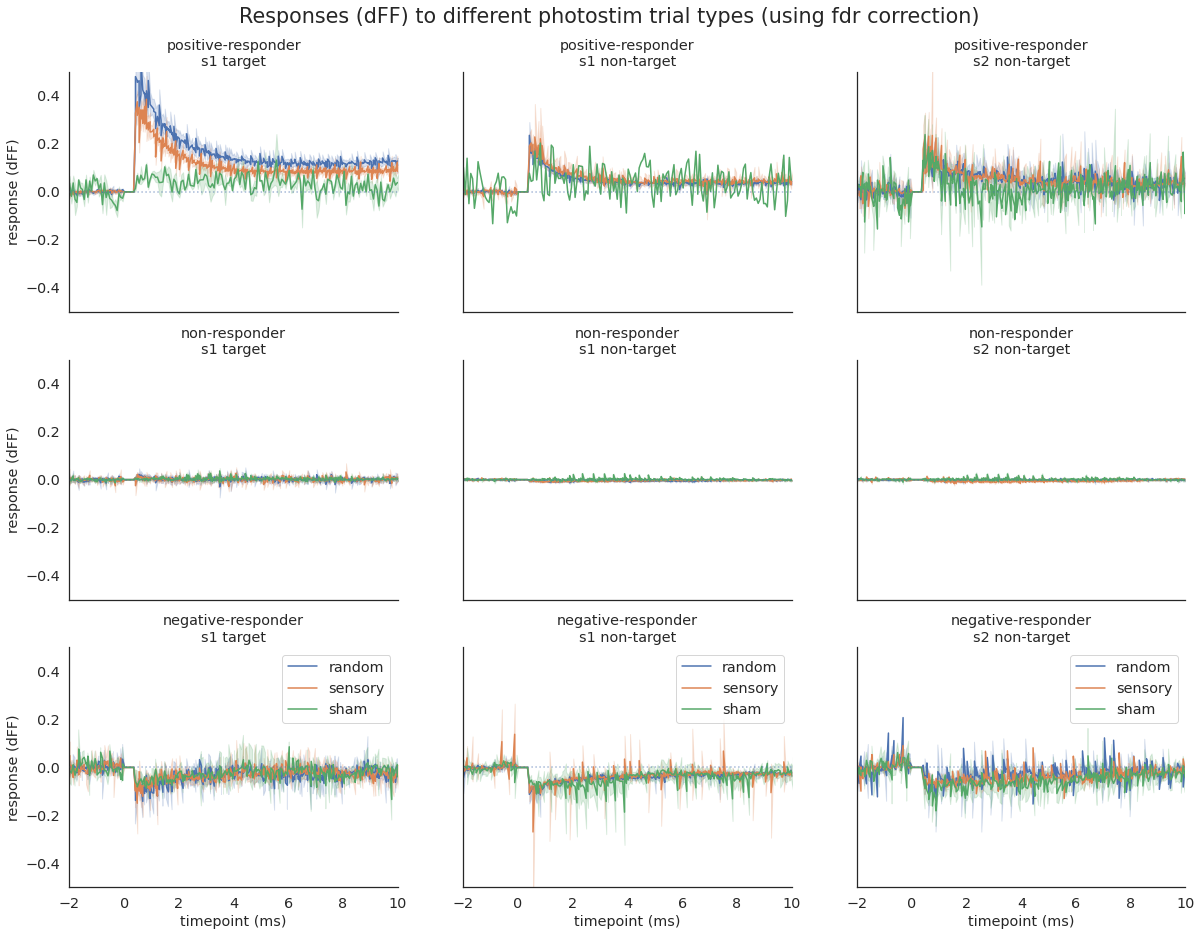

In [110]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
resp_sign = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True, figsize=(20,15))

for test, trial, target, sign, response in zip(stat_test, trial_type, target_type, resp_sign, responses):

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].index

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].index

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].index
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].index
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for row, cell_id_lists in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                         [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                         [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                        ]):
        for col, cell_id_list in enumerate(cell_id_lists):
            
            df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
            filtered_df = cell_mean_timepoint_df[df_filter]
            
            ax = axes[row,col]
            sns.lineplot(x='timepoint', y=response, estimator='mean', ci=95, data=filtered_df, ax=ax, label=trial, legend=False)

# define plot titles, axes etc.
plt.suptitle('Responses (dFF) to different photostim trial types (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');

sign = ['positive-responder', 'non-responder', 'negative-responder']
photostim_id = ['s1 target', 's1 non-target', 's2 non-target']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        if row_i == 2: 
            col.set_xlabel('timepoint (ms)')
            col.legend()
        if col_i == 0: col.set_ylabel('response (dFF)')
        col.set_title(sign[row_i] + '\n' + photostim_id[col_i])
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5);
        col.set_ylim([-0.5, 0.5])
        col.set_xlim([-2, 10])

save_path = os.path.join(qnap_path, session_type + '_DffTrace_TrialMean_' + test_type + '_lineplot_row_ResponseType_col_TargetID')
# ia.savePlot(save_path)

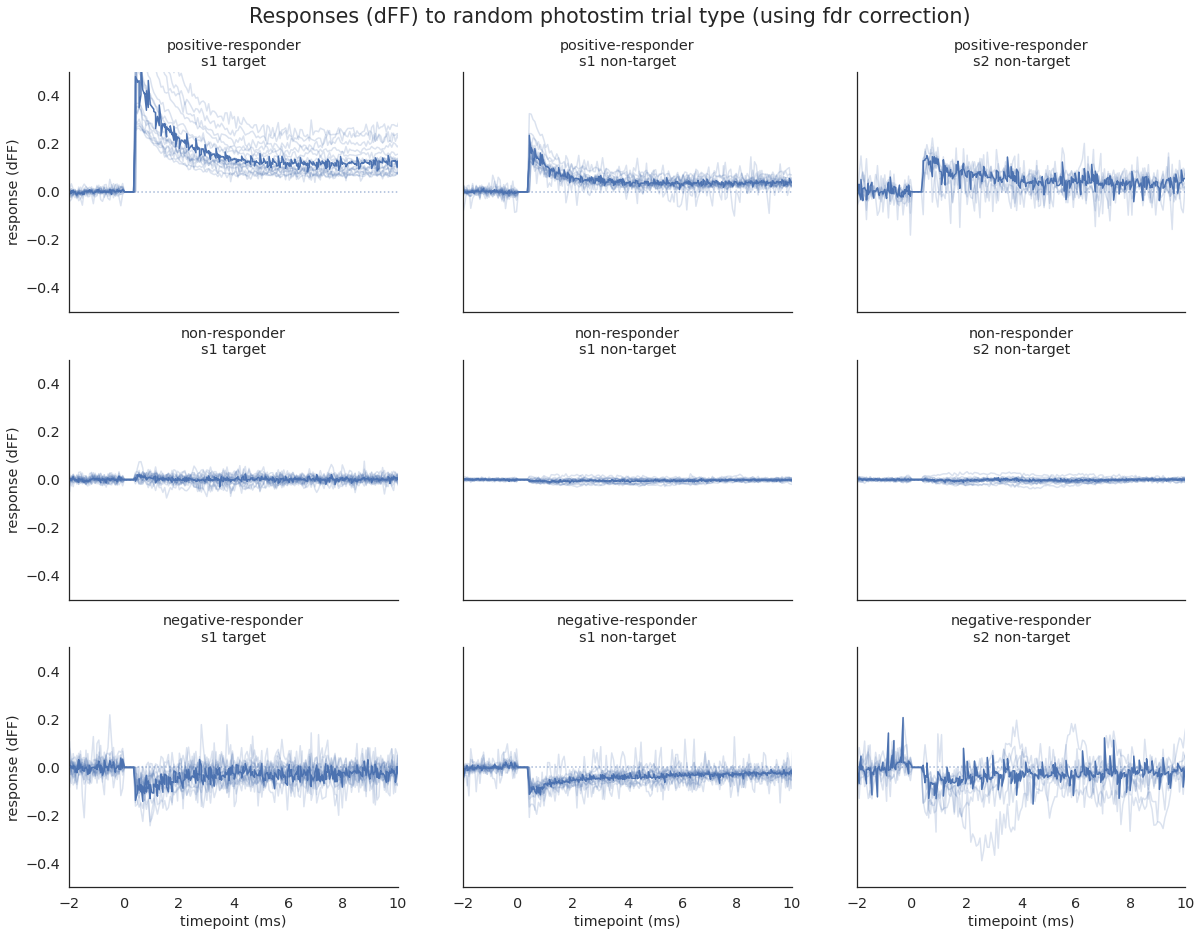

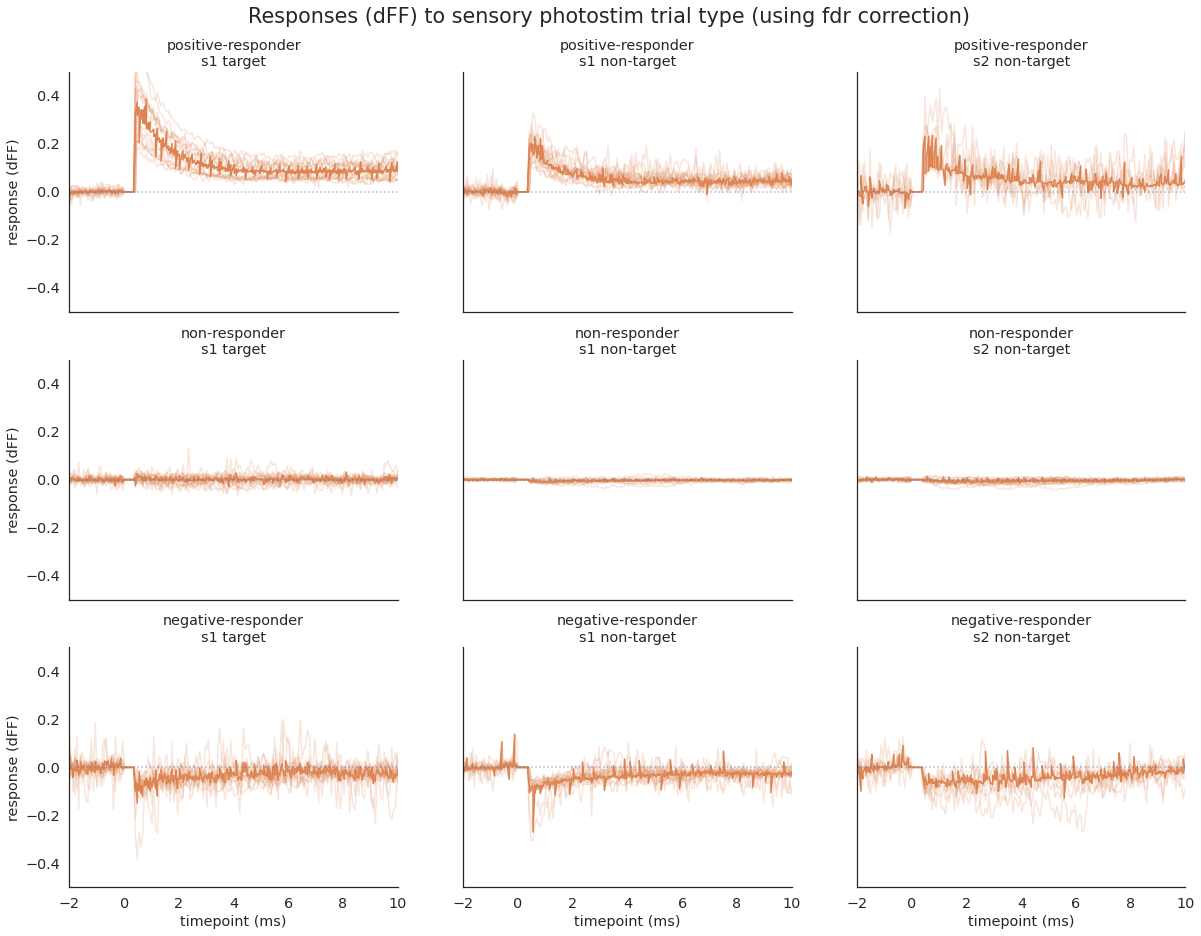

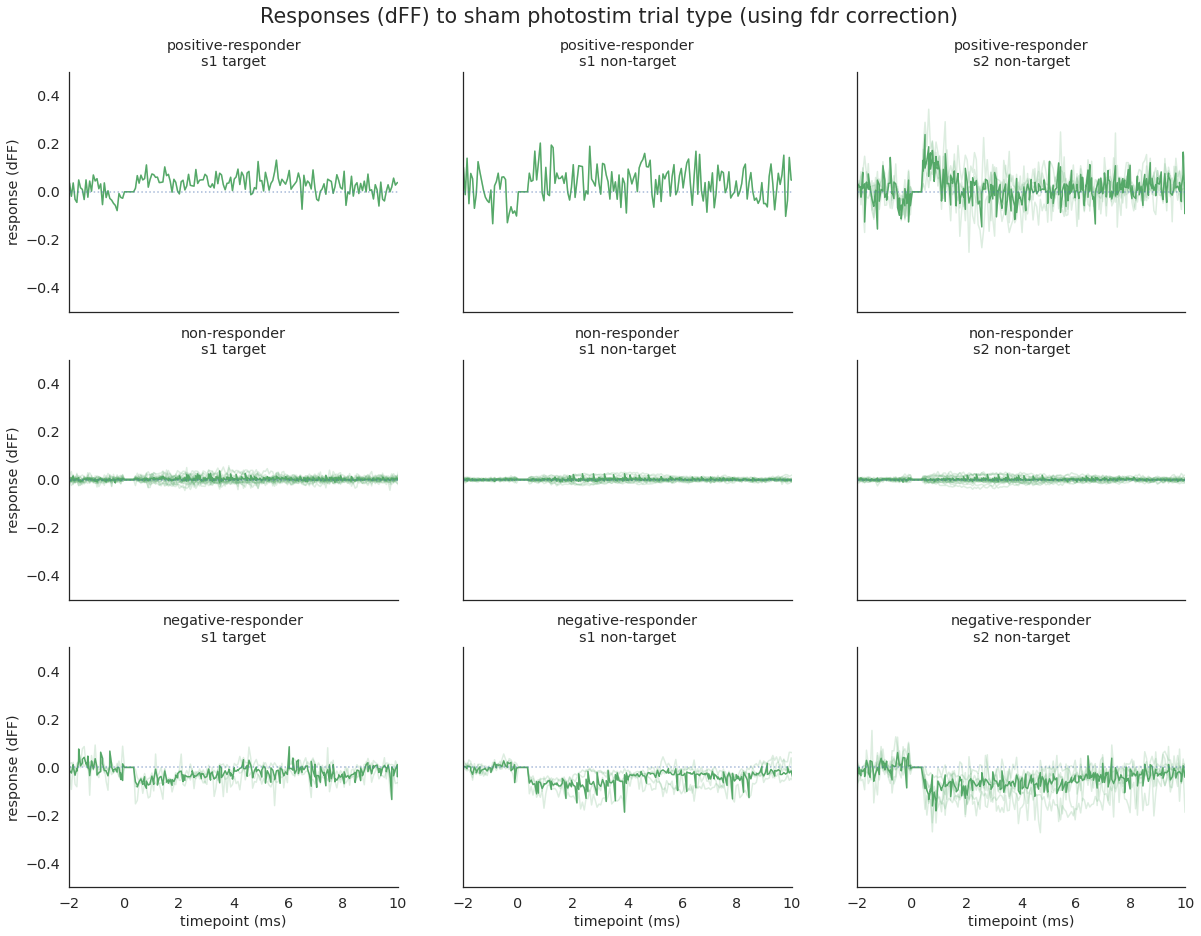

In [109]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
resp_sign = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']
colors=['C0','C1','C2']

for test, trial, target, sign, response, color in zip(stat_test, trial_type, target_type, resp_sign, responses, colors):

    fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True, figsize=(20,15))
    
    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].index

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].index

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].index
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].index
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for row, cell_id_lists in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                         [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                         [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                        ]):
        for col, cell_id_list in enumerate(cell_id_lists):
            
            df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
            filtered_df = cell_mean_timepoint_df[df_filter]
            groups = filtered_df.groupby('session_id')
            
            ax = axes[row,col]
            for group in groups:
                sns.lineplot(x='timepoint', y=response, estimator='mean', ci=None, data=group[1], color=color, alpha=0.2, ax=ax)
            sns.lineplot(x='timepoint', y=response, estimator='mean', ci=None, data=filtered_df, color=color, ax=ax)

    # define plot titles, axes etc.
    plt.suptitle('Responses (dFF) to ' + trial + ' photostim trial type (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');

    sign = ['positive-responder', 'non-responder', 'negative-responder']
    photostim_id = ['s1 target', 's1 non-target', 's2 non-target']

    for row_i, row in enumerate(axes):
        for col_i, col in enumerate(row):
            if row_i == 2: 
                col.set_xlabel('timepoint (ms)')
            if col_i == 0: col.set_ylabel('response (dFF)')
            col.set_title(sign[row_i] + '\n' + photostim_id[col_i])
            col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5);
            col.set_ylim([-0.5, 0.5])
            col.set_xlim([-2, 10])

# save_path = os.path.join(qnap_path, session_type + '_DffTrace_TrialMean_' + test_type + '_lineplot_row_ResponseType_col_TargetID')
# ia.savePlot(save_path)

# Number of responding cells (swarmplot)
## plots = fdr vs nomulti correction
## cols = trial type
## rows = responder type
## boxes = target identity

In [ ]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
trial_type = ['random', 'sensory', 'sham']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').count()
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').count()
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].groupby('session_id').count()

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').count()
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').count()
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].groupby('session_id').count()

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').count()
    
    for row, df_count in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                    [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                    [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                   ]):
        df = pd.DataFrame({'s1\ntargets'     : df_count[0]['cell_num'],
                           's1\nnon-targets' : df_count[1]['cell_num'],
                           's2\nnon-targets' : df_count[2]['cell_num']
                          })
        sns.swarmplot(data=df, ax=axes[row, stim_id], color='k', edgecolor='k')
        color = 'C' + str(stim_id)
        sns.violinplot(data=df, ax=axes[row, stim_id], color=color, cut=0, scale='width')

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(trial_type[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('number of cells')
        col.hlines(0, -0.5, 2.5, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Number of responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_NumRespondingCells_' + test_type + '_boxswarmplot_row_ResponseType_col_TrialType_splitby_TargetID')
ia.savePlot(save_path)

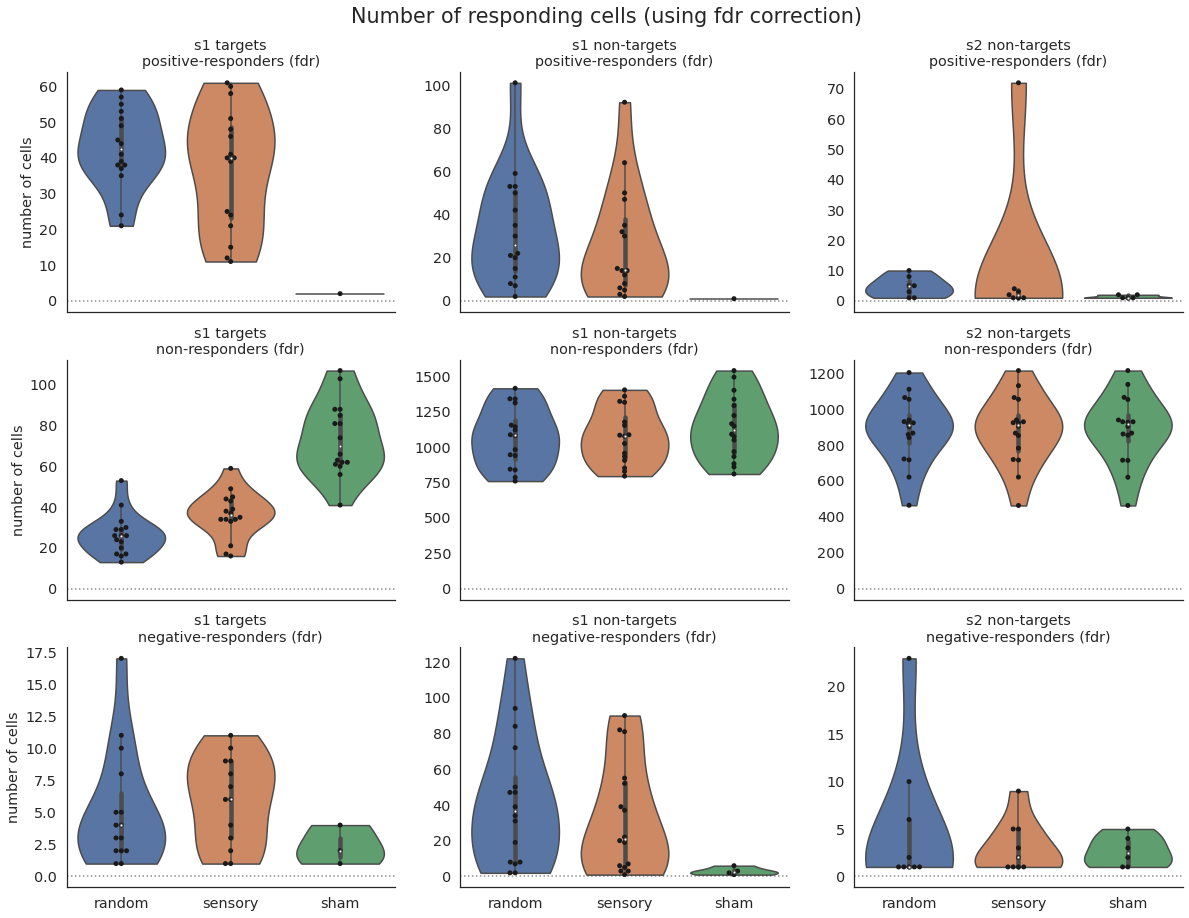

In [108]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
trial_type = ['random', 'sensory', 'sham']

s1_targets_pos_df = pd.DataFrame()
s1_nontargets_pos_df = pd.DataFrame()
s2_nontargets_pos_df = pd.DataFrame()

s1_targets_non_df = pd.DataFrame()
s1_nontargets_non_df = pd.DataFrame()
s2_nontargets_non_df = pd.DataFrame()

s1_targets_neg_df = pd.DataFrame()
s1_nontargets_neg_df = pd.DataFrame()
s2_nontargets_neg_df = pd.DataFrame()

for stim_id, trial in enumerate(trial_type):
        
    # define column names
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]
    
    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').count()
    s1_targets_pos_df = pd.concat([s1_targets_pos_df, pd.DataFrame({trial : s1_targets_pos['cell_num']})])
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').count()
    s1_nontargets_pos_df = pd.concat([s1_nontargets_pos_df, pd.DataFrame({trial : s1_nontargets_pos['cell_num']})])
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].groupby('session_id').count()
    s2_nontargets_pos_df = pd.concat([s2_nontargets_pos_df, pd.DataFrame({trial : s2_nontargets_pos['cell_num']})])

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()
    s1_targets_non_df = pd.concat([s1_targets_non_df, pd.DataFrame({trial : s1_targets_non['cell_num']})])
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()
    s1_nontargets_non_df = pd.concat([s1_nontargets_non_df, pd.DataFrame({trial : s1_nontargets_non['cell_num']})])
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').count()
    s2_nontargets_non_df = pd.concat([s2_nontargets_non_df, pd.DataFrame({trial : s2_nontargets_non['cell_num']})])

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').count()
    s1_targets_neg_df = pd.concat([s1_targets_neg_df, pd.DataFrame({trial : s1_targets_neg['cell_num']})])
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').count()
    s1_nontargets_neg_df = pd.concat([s1_nontargets_neg_df, pd.DataFrame({trial : s1_nontargets_neg['cell_num']})])
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].groupby('session_id').count()
    s2_nontargets_neg_df = pd.concat([s2_nontargets_neg_df, pd.DataFrame({trial : s2_nontargets_neg['cell_num']})])

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(20,15))

data_array = [[s1_targets_pos_df, s1_nontargets_pos_df, s2_nontargets_pos_df],
              [s1_targets_non_df, s1_nontargets_non_df, s2_nontargets_non_df],
              [s1_targets_neg_df, s1_nontargets_neg_df, s2_nontargets_neg_df]
             ]

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]
col_titles = ['s1 targets', 's1 non-targets', 's2 non-targets']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        ax=axes[row_i,col_i]
        sns.swarmplot(data=data_array[row_i][col_i], color='k', ax=ax, edgecolor='k')
        sns.violinplot(data=data_array[row_i][col_i], ax=ax, cut=0, scale='width')
        
        col.set_title(col_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('number of cells')
        col.hlines(0, -0.5, 2.5, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Number of responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');

# save the figure
# save_path = os.path.join(qnap_path, session_type + '_NumRespondingCells_' + test_type + '_boxswarmplot_row_ResponseType_col_TrialType_splitby_TargetID')
# ia.savePlot(save_path)

# Total activity in responding cells (swarmplot)
## plots = fdr vs nomulti correction
## cols = trial type
## rows = responder type
## boxes = target identity

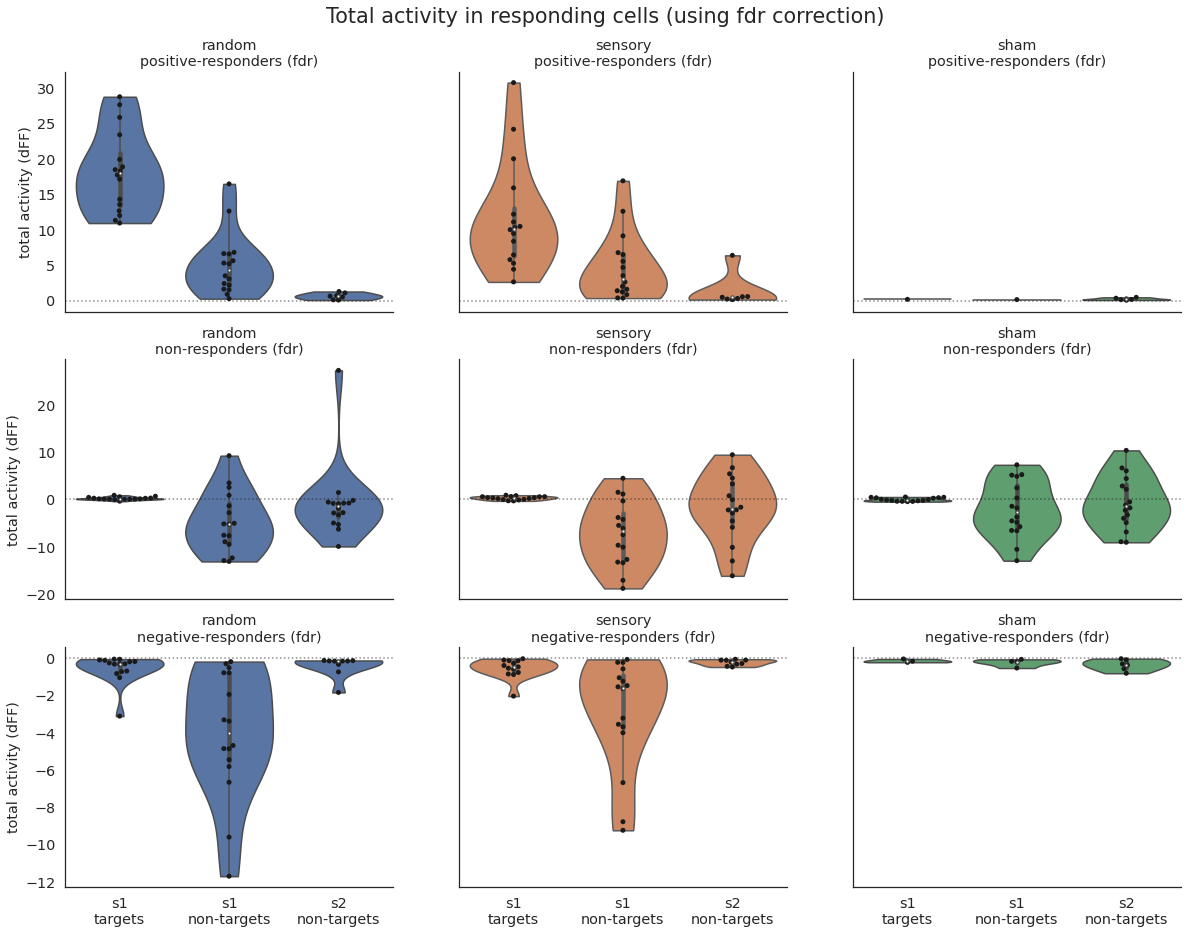

In [107]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']
trial_type = ['random', 'sensory', 'sham']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').sum()
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].groupby('session_id').sum()

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].groupby('session_id').sum()

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').sum()
    
    for row, summed_df in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                    [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                    [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                   ]):
        df = pd.DataFrame({'s1\ntargets'     : summed_df[0][response],
                           's1\nnon-targets' : summed_df[1][response],
                           's2\nnon-targets' : summed_df[2][response]
                          })
        sns.swarmplot(data=df, ax=axes[row, stim_id], color='k', edgecolor='k')
        color = 'C' + str(stim_id)
        sns.violinplot(data=df, ax=axes[row, stim_id], color=color, cut=0, scale='width')

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(trial_type[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('total activity (dFF)')
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Total activity in responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_TotalActivity_' + test_type + '_boxswarmplot_row_ResponseType_col_TrialType_splitby_TargetID')
ia.savePlot(save_path)

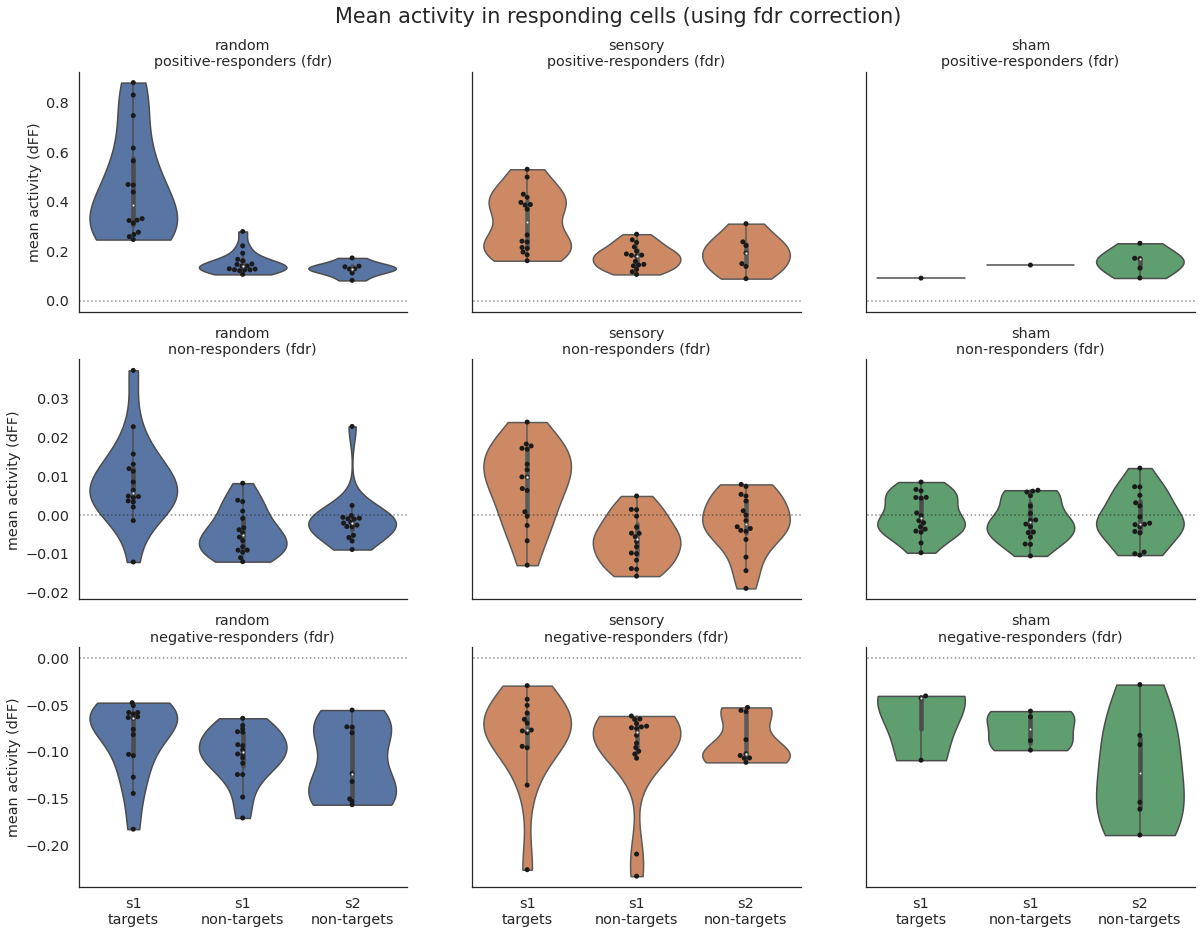

In [106]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']
trial_type = ['random', 'sensory', 'sham']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').mean()
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').mean()
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].groupby('session_id').mean()

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').mean()
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').mean()
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].groupby('session_id').mean()

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').mean()
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').mean()
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').mean()
    
    for row, summed_df in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                    [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                    [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                   ]):
        df = pd.DataFrame({'s1\ntargets'     : summed_df[0][response],
                           's1\nnon-targets' : summed_df[1][response],
                           's2\nnon-targets' : summed_df[2][response]
                          })
        sns.swarmplot(data=df, ax=axes[row, stim_id], color='k', edgecolor='k')
        color = 'C' + str(stim_id)
        sns.violinplot(data=df, ax=axes[row, stim_id], color=color, cut=0, scale='width')

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(trial_type[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('mean activity (dFF)')
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Mean activity in responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
# save_path = os.path.join(qnap_path, session_type + '_MeanActivity_' + test_type + '_boxswarmplot_row_ResponseType_col_TrialType_splitby_TargetID')
# ia.savePlot(save_path)

# Target input vs non-target output activity in responding cells (scatterplot)
## plots = fdr vs nomulti correction
## cols = local vs downstream
## rows = responder type
## splitby = trial type

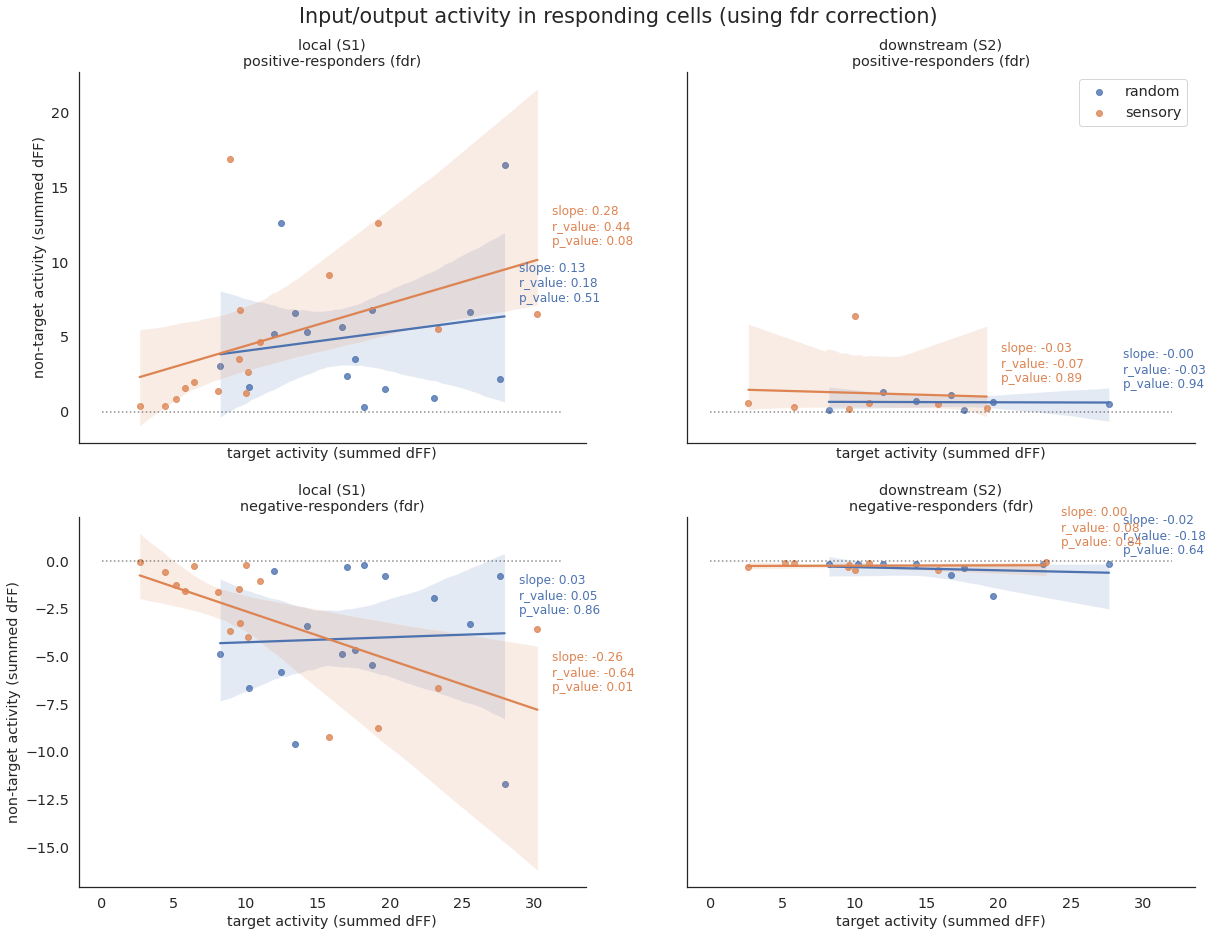

In [105]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
    trial_type = ['random', 'sensory']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
    trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=2, ncols=2, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].groupby('session_id').sum()

    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    
    for row, pos_neg_df in enumerate([[s1_nontargets_pos, s2_nontargets_pos],
                                      [s1_nontargets_neg, s2_nontargets_neg]                              
                                     ]):
        for col, target_nontarget_df in enumerate(pos_neg_df):
            df = pd.DataFrame({'target activity (summed dFF)'    : s1_targets[response],
                               'non-targets'                     : target_nontarget_df[response]
                              })
            p = sns.regplot(x='target activity (summed dFF)', y='non-targets', data=df, label=trial, ax=axes[row, col], ci=95, fit_reg=True)
            
            df = df.dropna() # remove axes containing NaN values (otherwise linregress doesn't function correctly)
            slope, _, r_value, p_value, _ = stats.linregress(x=df['target activity (summed dFF)'], y=df['non-targets'])
            
            max_y, max_x = p.get_lines()[-1].get_ydata()[-1], p.get_lines()[-1].get_xdata()[-1] # get max x/y coords of line
            axes[row,col].text(max_x+1, max_y+1, 'slope: {:.2f} \nr_value: {:.2f} \np_value: {:.2f}'.format(slope, r_value, p_value),
                               color='C' + str(stim_id)) 
            
row_titles = ['positive-responders (' + test_type + ')', 
              'negative-responders (' + test_type + ')'
             ]
column_titles = ['local (S1)', 'downstream (S2)']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(column_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('non-target activity (summed dFF)')
        else: col.set_ylabel('')
        if col_i==1 and row_i==0: col.legend()
        col.set_xlabel('target activity (summed dFF)')
        col.hlines(0, 0, 32, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Input/output activity in responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_InputOutput_' + test_type + '_regplot_row_ResponseType_col_TargetID_splitby_TrialType')
ia.savePlot(save_path)

# Target input vs non-target output activity in all cells, responding or not (scatterplot)

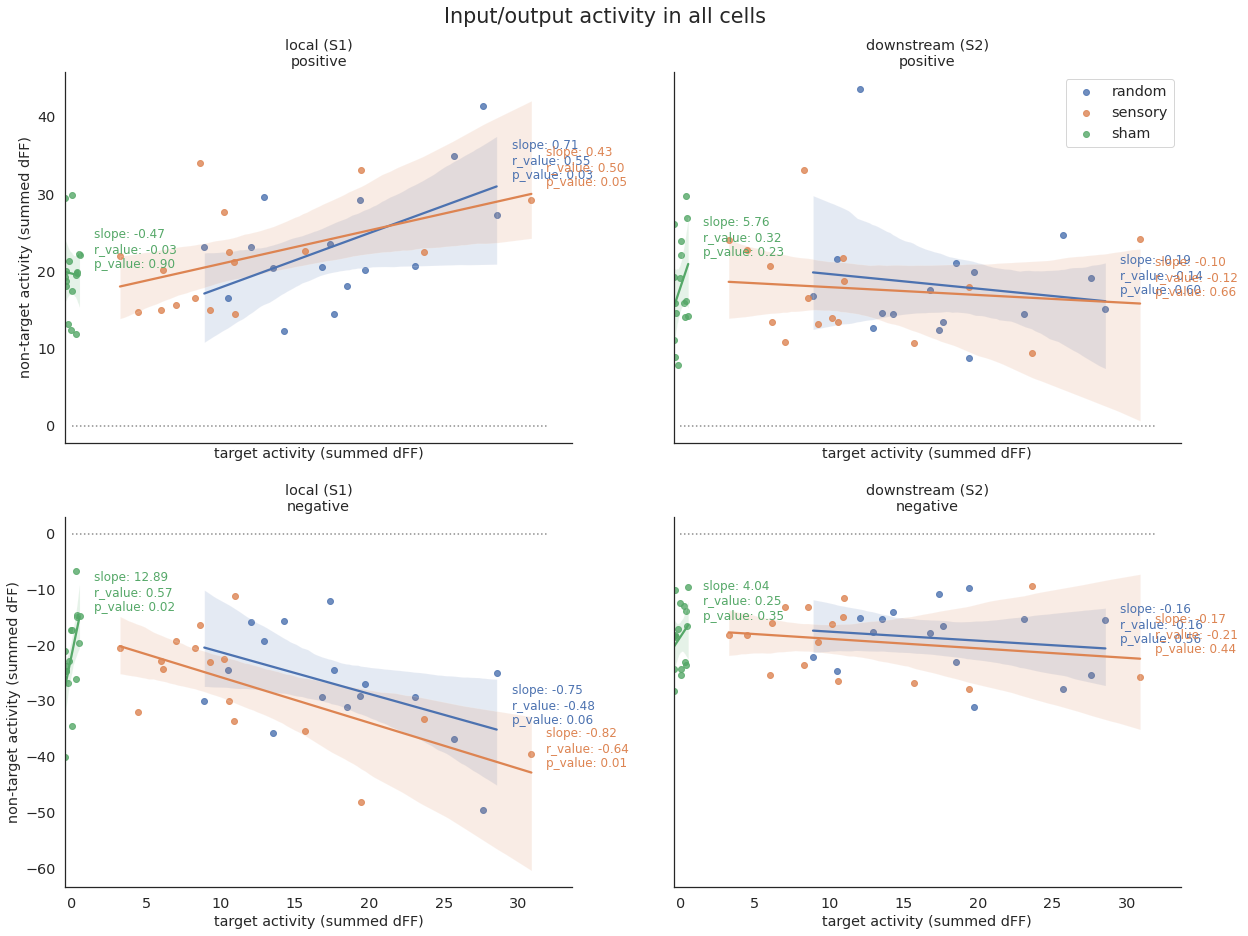

In [99]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']
trial_type = ['random', 'sensory', 'sham']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=2, ncols=2, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s1_nontargets_pos = cell_df[~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_pos = cell_df[~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].groupby('session_id').sum()

    s1_nontargets_neg = cell_df[~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_neg = cell_df[~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    
    for row, pos_neg_df in enumerate([[s1_nontargets_pos, s2_nontargets_pos],
                                      [s1_nontargets_neg, s2_nontargets_neg]                              
                                     ]):
        for col, target_nontarget_df in enumerate(pos_neg_df):
            df = pd.DataFrame({'target activity (summed dFF)'    : s1_targets[response],
                               'non-targets'                     : target_nontarget_df[response]
                              })
            p = sns.regplot(x='target activity (summed dFF)', y='non-targets', data=df, label=trial, ax=axes[row, col], ci=95, fit_reg=True)
            
            df = df.dropna() # remove axes containing NaN values (otherwise linregress doesn't function correctly)
            slope, _, r_value, p_value, _ = stats.linregress(x=df['target activity (summed dFF)'], y=df['non-targets'])
            
            max_y, max_x = p.get_lines()[-1].get_ydata()[-1], p.get_lines()[-1].get_xdata()[-1] # get max x/y coords of line
            axes[row,col].text(max_x+1, max_y+1, 'slope: {:.2f} \nr_value: {:.2f} \np_value: {:.2f}'.format(slope, r_value, p_value),
                               color='C' + str(stim_id)) 
            
row_titles = ['positive', 
              'negative'
             ]
column_titles = ['local (S1)', 'downstream (S2)']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(column_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('non-target activity (summed dFF)')
        else: col.set_ylabel('')
        if col_i==1 and row_i==0: col.legend()
        col.set_xlabel('target activity (summed dFF)')
        col.hlines(0, 0, 32, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Input/output activity in all cells', y=0.94, fontsize='xx-large');
    
# save the figure
# save_path = os.path.join(qnap_path, session_type + '_InputOutput_' + test_type + '_regplot_row_ResponseType_col_TargetID_splitby_TrialType')
# ia.savePlot(save_path)

# Input vs output activity in all trials, any cell, not just responding (scatterplot)

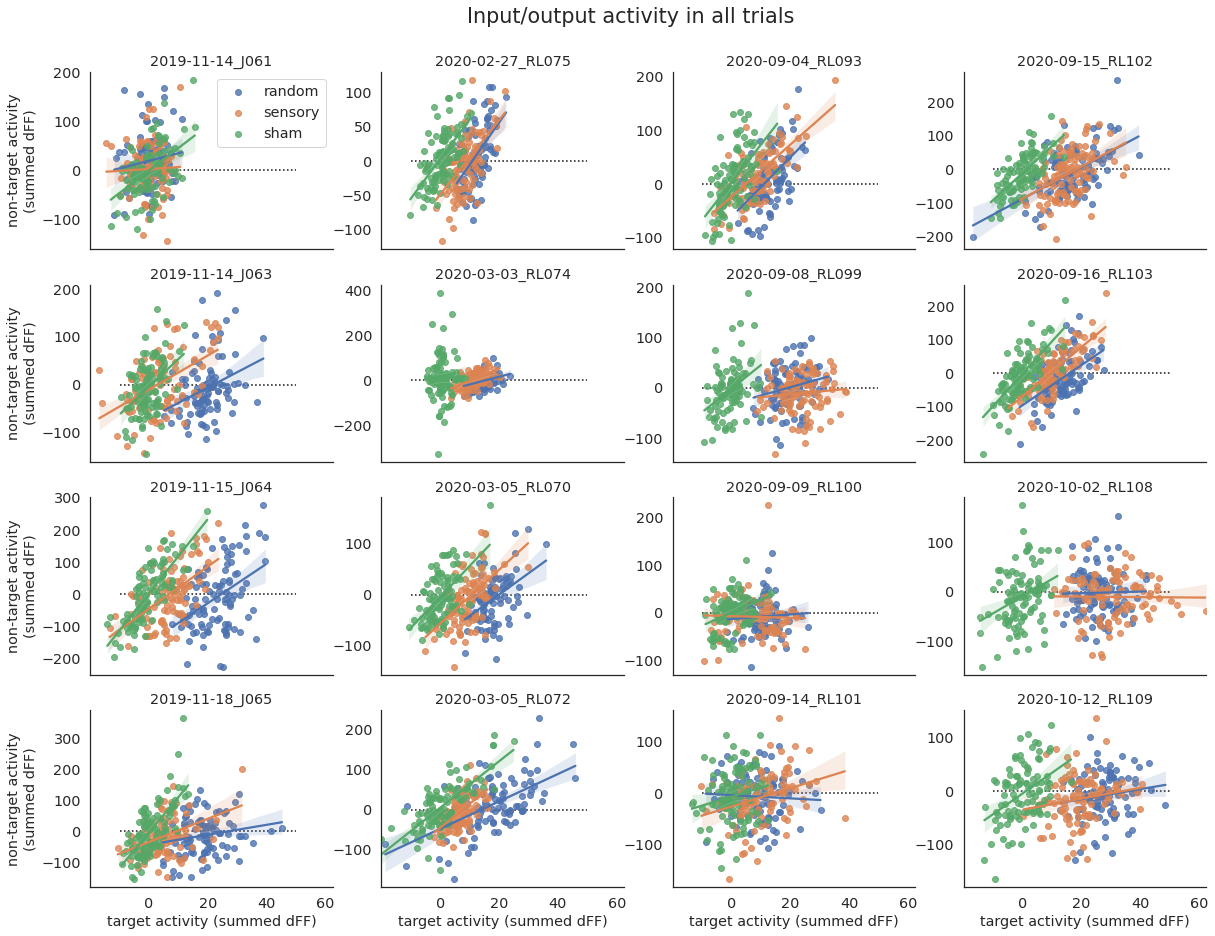

In [97]:
# input output within animals
# take responding cells and plot sum target vs. non target across all trials
# pr and ps in single plot for each animal, all trials

cell_trial_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_trial_df.pkl')
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')

responses = ['pr_amp_resp', 'ps_amp_resp', 'spont_amp_resp']
targets = ['pr_target', 'ps_target', 'pr_target']
trials = ['random', 'sensory', 'sham']

session_ids = cell_trial_df['session_id'].unique()

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, figsize=(20,15))

for response, target, trial in zip(responses, targets, trials):
    
    s1_cell_ids = cell_df.query('s1_cell & ~' + target).index
    s2_cell_ids = cell_df.query('s2_cell & ~' + target).index
    target_cell_ids = cell_df.query(target).index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    target_df = cell_trial_df[target_filter]
    target_amp_resp = target_df.groupby(['trial_num','session_id']).sum()[response]

    s1_filter = cell_trial_df['cell_id'].isin(s1_cell_ids)
    s1_df = cell_trial_df[s1_filter]
    s1_amp_resp = s1_df.groupby(['trial_num','session_id']).sum()[response]

    s2_filter = cell_trial_df['cell_id'].isin(s2_cell_ids)
    s2_df = cell_trial_df[s2_filter]
    s2_amp_resp = s2_df.groupby(['trial_num','session_id']).sum()[response]

    df = pd.DataFrame({'target_amp_resp' : target_amp_resp,
                       's1_amp_resp'     : s1_amp_resp,
                       's2_amp_resp'     : s2_amp_resp})

    df = df.reset_index(drop=False)
    
    for row_i, row in enumerate(axes):
        for col_i, col in enumerate(row):
            ax = axes[row_i, col_i]
            sns.regplot(x='target_amp_resp', y='s1_amp_resp', data=df[df['session_id']==session_ids[4*col_i+row_i]], ax=ax, label=trial)
            
            col.set_title(session_ids[4*col_i+row_i])
            col.hlines(0, -10, 50, linestyles='dotted', zorder=0, alpha=0.5, color='k');
            
            if col_i == 0: col.set_ylabel('non-target activity\n(summed dFF)')
            else: col.set_ylabel('')
                
            if col_i==0 and row_i==0: col.legend()
                
            if row_i==3: col.set_xlabel('target activity (summed dFF)')
            else: col.set_xlabel('')
                
plt.suptitle('Input/output activity in all trials', y=0.94, fontsize='xx-large');

# Input vs output activity in all trials for responding cells, >1 sd baseline response (scatterplot)

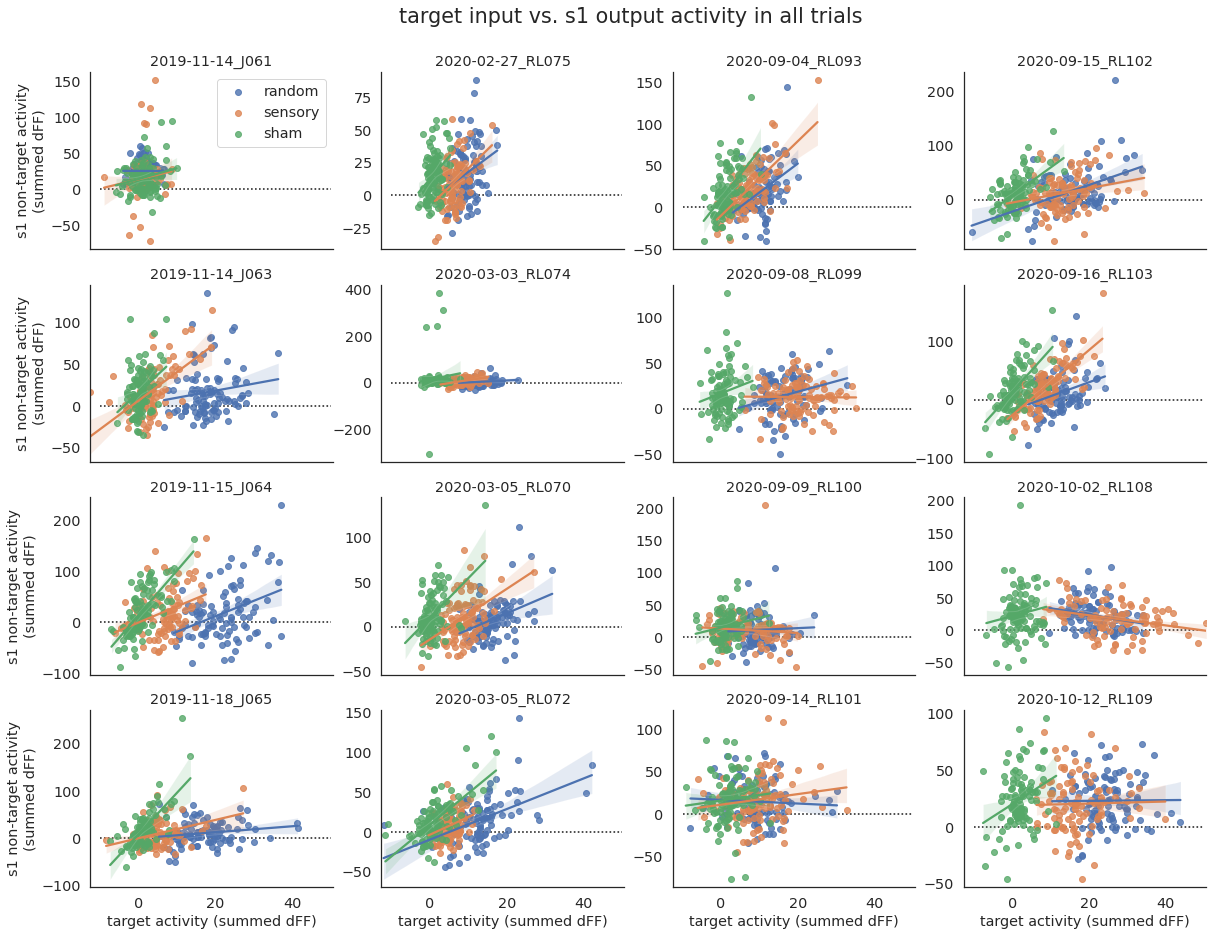

In [96]:
# input output within animals
# take responding cells and plot sum target vs. non target across all trials
# pr and ps in single plot for each animal, all trials

cell_trial_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_trial_df.pkl')
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')

input_ = 'target'
output_ = 's1'

responses = ['pr_amp_resp', 'ps_amp_resp', 'spont_amp_resp']
targets = ['pr_target', 'ps_target', 'pr_target']
trials = ['random', 'sensory', 'sham']
tests = ['trial_sig_dff_pr', 'trial_sig_dff_ps', 'trial_sig_dff_spont']

session_ids = cell_trial_df['session_id'].unique()

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, figsize=(20,15))

for response, target, trial, test in zip(responses, targets, trials, tests):
    
    s1_cell_ids = cell_df.query('s1_cell & ~' + target).index
    s2_cell_ids = cell_df.query('s2_cell & ~' + target).index
    target_cell_ids = cell_df.query(target).index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    target_df = cell_trial_df[target_filter].dropna().query(test)
    target_amp_resp = target_df.groupby(['trial_num','session_id']).sum()[response]

    s1_filter = cell_trial_df['cell_id'].isin(s1_cell_ids)
    s1_df = cell_trial_df[s1_filter].dropna().query(test)
    s1_amp_resp = s1_df.groupby(['trial_num','session_id']).sum()[response]

    s2_filter = cell_trial_df['cell_id'].isin(s2_cell_ids)
    s2_df = cell_trial_df[s2_filter].dropna().query(test)
    s2_amp_resp = s2_df.groupby(['trial_num','session_id']).sum()[response]

    df = pd.DataFrame({'target_amp_resp' : target_amp_resp,
                       's1_amp_resp'     : s1_amp_resp,
                       's2_amp_resp'     : s2_amp_resp})

    df = df.reset_index(drop=False)
    
    for row_i, row in enumerate(axes):
        for col_i, col in enumerate(row):
            ax = axes[row_i, col_i]
            sns.regplot(x=input_+'_amp_resp', y=output_+'_amp_resp', data=df[df['session_id']==session_ids[4*col_i+row_i]], ax=ax, label=trial)
            
            col.set_title(session_ids[4*col_i+row_i])
            col.hlines(0, -10, 50, linestyles='dotted', zorder=0, alpha=0.5, color='k');
            
            if col_i == 0: col.set_ylabel(output_ + ' non-target activity\n(summed dFF)')
            else: col.set_ylabel('')
                
            if col_i==0 and row_i==0: col.legend()
                
            if row_i==3: col.set_xlabel(input_ + ' activity (summed dFF)')
            else: col.set_xlabel('')
                
plt.suptitle(input_ + ' input vs. ' + output_ + ' output activity in all trials', y=0.94, fontsize='xx-large');

# Probability of response in all cells between trial types (scatterplot)

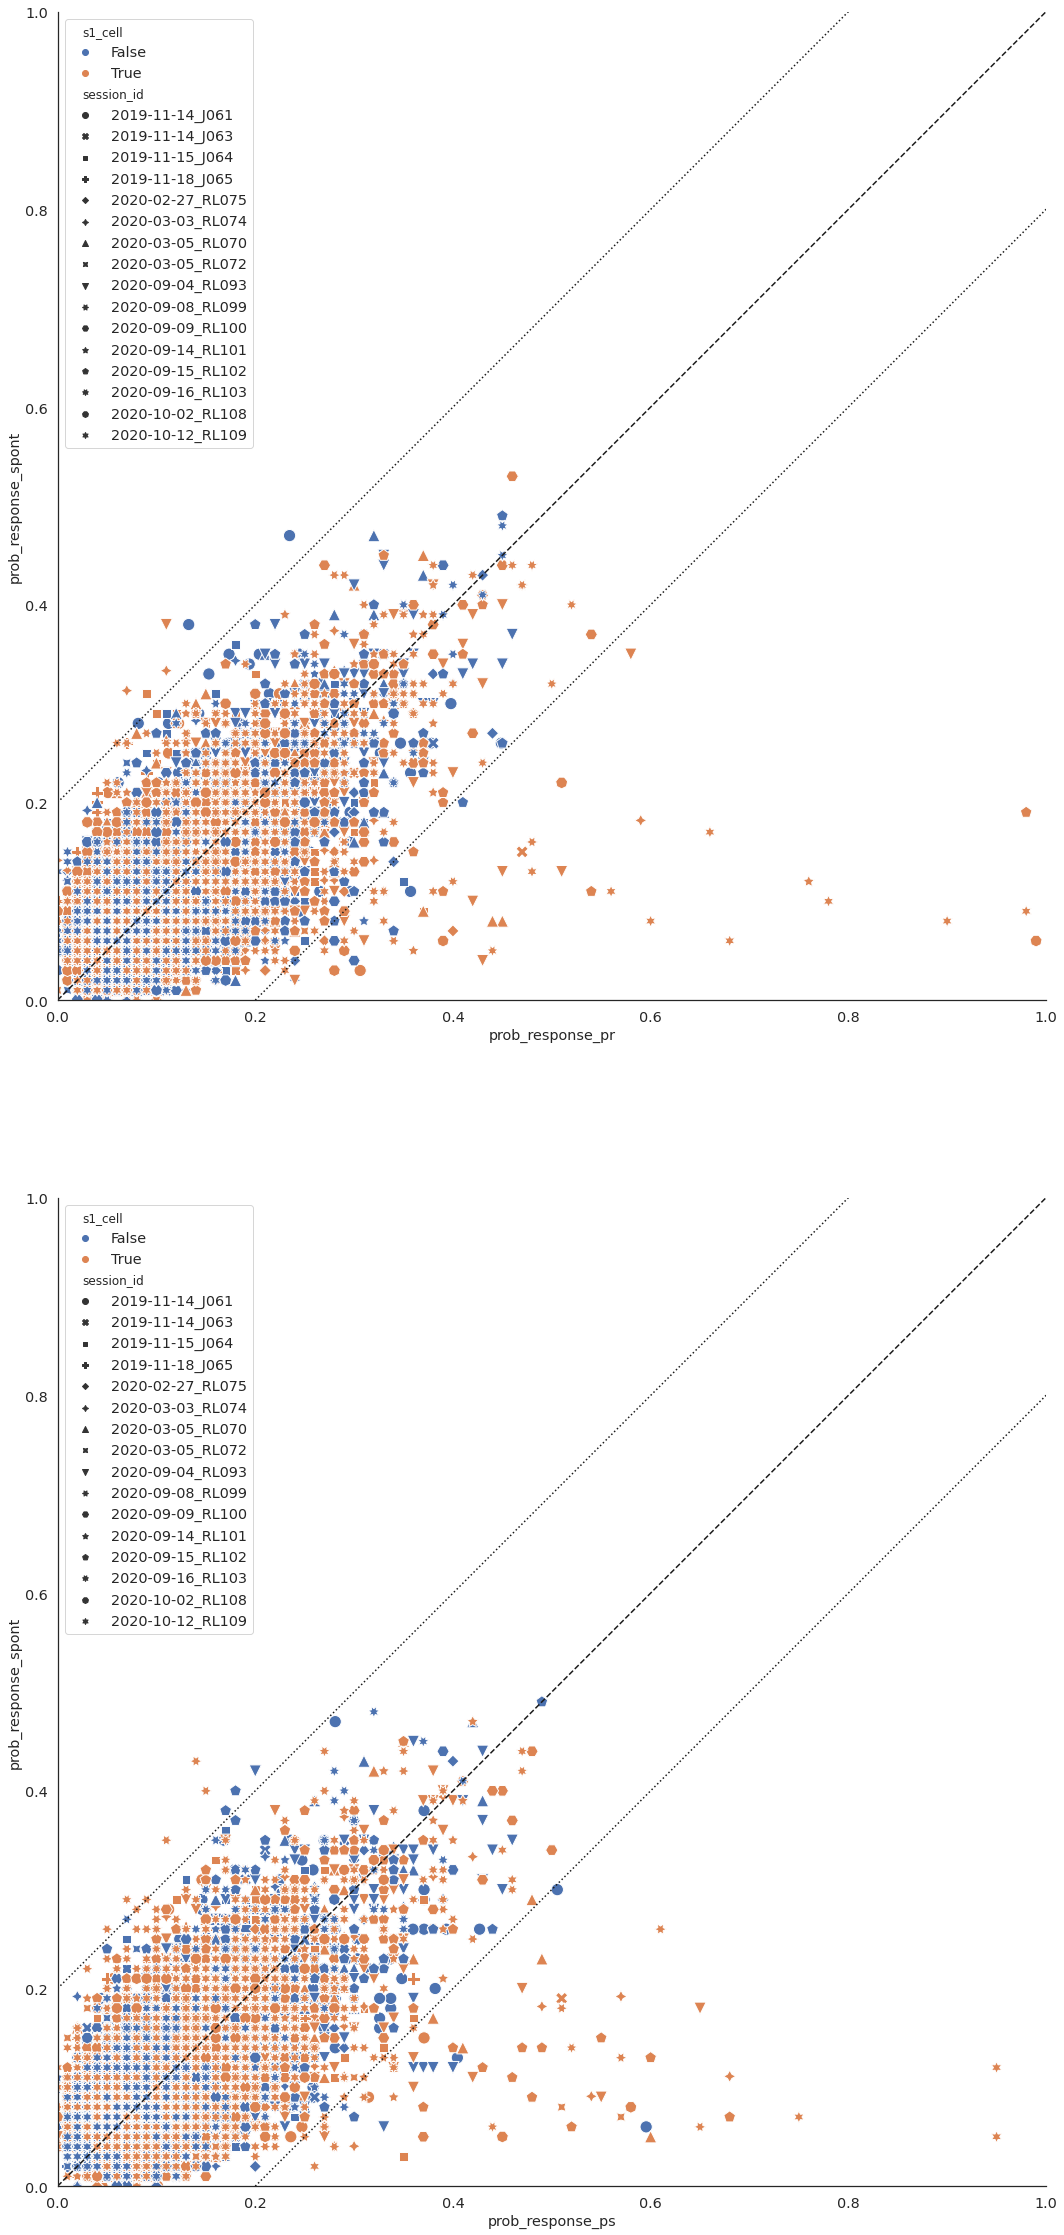

In [93]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')

trials = ['pr', 'ps']

fig, axes = plt.subplots(nrows=2, figsize=(20,40))

for trial, ax in zip(trials, axes):
    sns.scatterplot(x='prob_response_'+trial, y='prob_response_spont', style='session_id', hue='s1_cell', data=cell_df.query('~' + trial + '_target'), ax=ax, color='k', s=150)
    ax.plot([0,1],[0,1], 'k', linestyle='dashed')
    ax.plot([0,1],[0.2,1.2], 'k', linestyle='dotted')
    ax.plot([0.2,1.2],[0,1], 'k', linestyle='dotted')
    ax.set_aspect('equal')
    ax.axis([0,1,0,1]);

# Average traces of individual cells with probability of response higher in photostim than sham (lineplots)

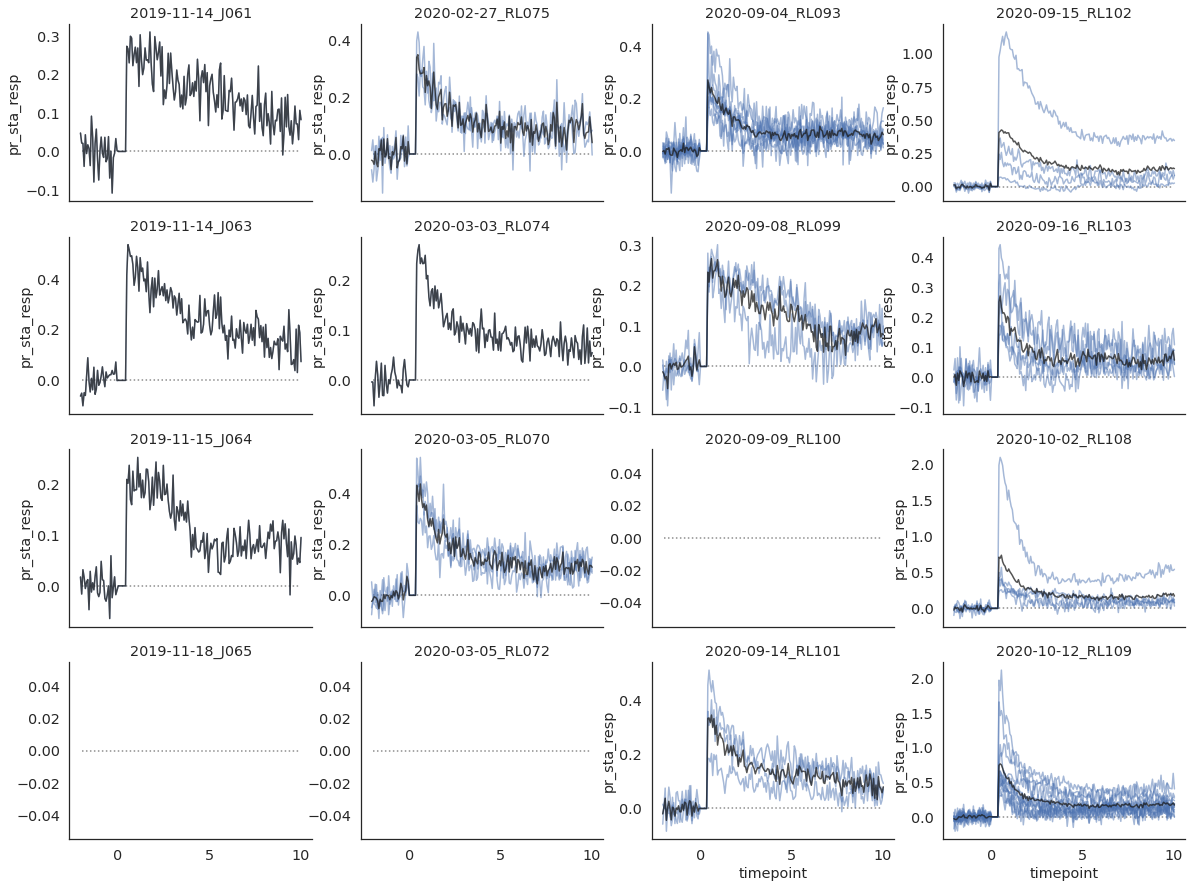

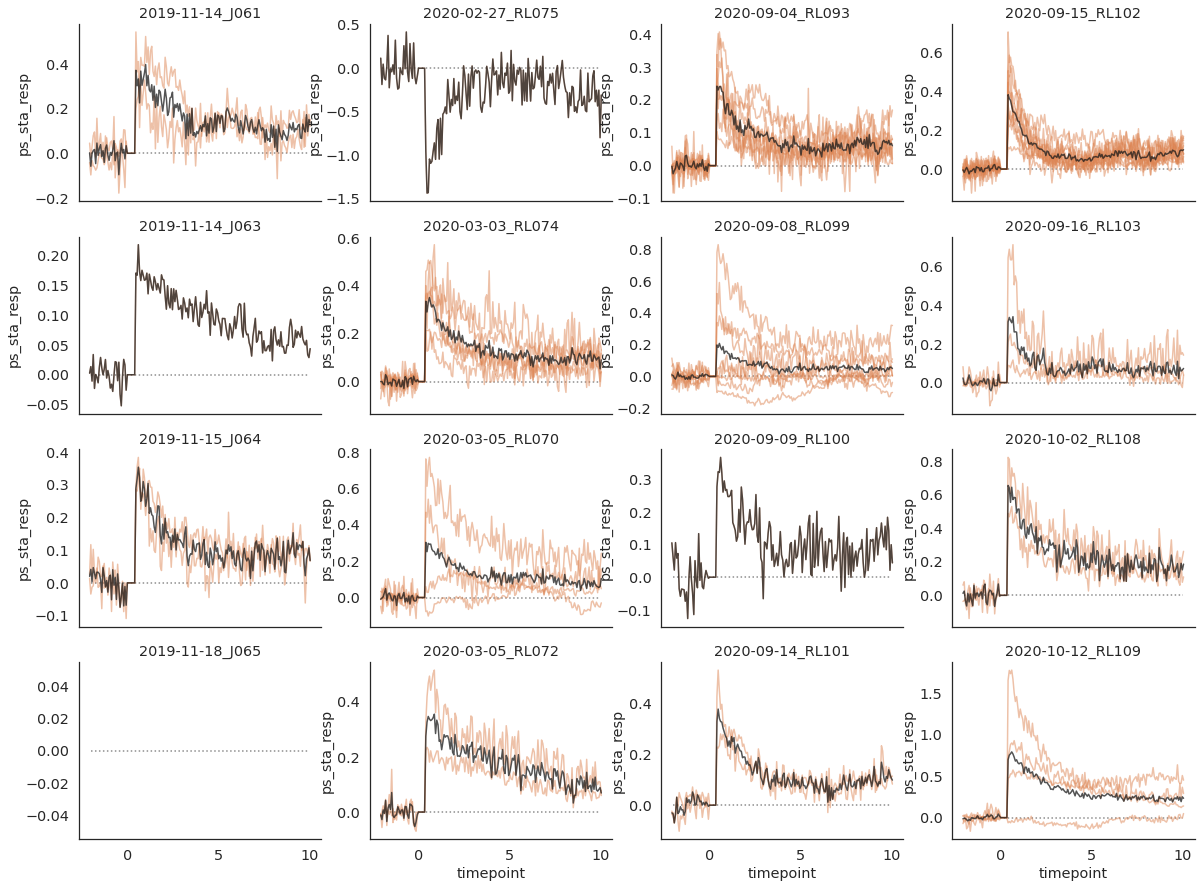

In [95]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

trials = ['pr', 'ps']
targets = ['pr', 'ps']
colors = ['C0', 'C1']

for color, trial, target in zip(colors, trials, targets):
    
    cell_ids = cell_df.query('(prob_response_' + trial + ' > (prob_response_spont + 0.2))' + 
                             '& ~' + target + '_target & s1_cell').index

    row_filter = cell_mean_timepoint_df['cell_id'].isin(cell_ids)
    filtered_df = cell_mean_timepoint_df[row_filter]

    session_ids = cell_trial_df['session_id'].unique()   

    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, figsize=(20,15))
    
    for row_i, row in enumerate(axes):
        for col_i, col in enumerate(row):
            ax = axes[row_i, col_i]

            session_df = filtered_df[filtered_df['session_id']==session_ids[4*col_i+row_i]]
#             print(session_ids[4*col_i+row_i], 'n_cells:', len(session_df['cell_id'].unique()))
            
            for group in session_df.groupby('cell_id'):
                sns.lineplot(x='timepoint', y=trial+'_sta_resp', data=group[1], ax=ax, label=trial, color=color, alpha=0.5, legend=False)
            sns.lineplot(x='timepoint', y=trial+'_sta_resp', data=session_df, ci=None, color='k', alpha=0.75, ax=ax, label=trial, legend=False)

            col.set_title(session_ids[4*col_i+row_i])
            col.hlines(0, -2, 10, linestyles='dotted', zorder=0, alpha=0.5, color='k');

# Number of targets responding on each trial (lineplots)

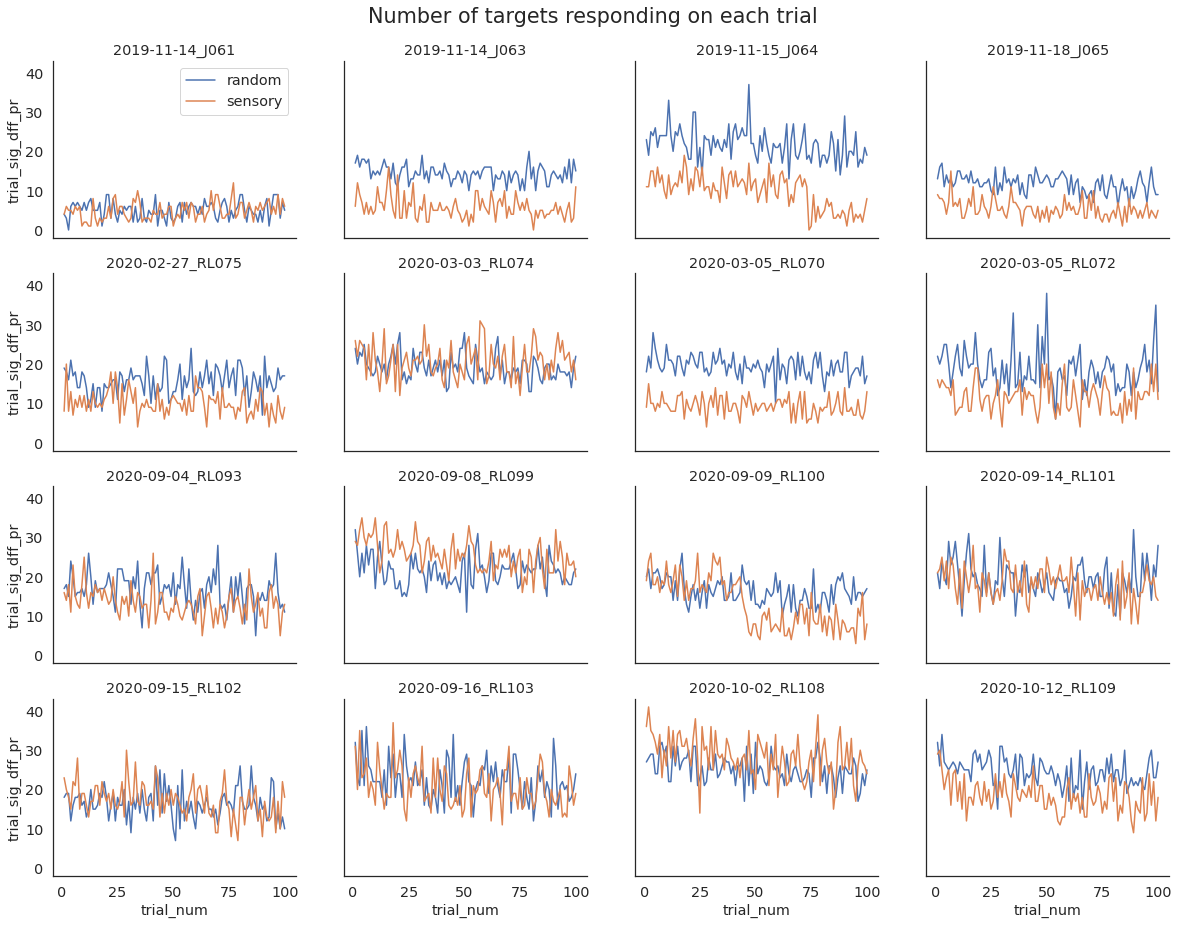

In [92]:
# Plot positive target responses over trials for all animals, on same graph
# plots = number, summed activity
# row/col = animal
# splitby = trial type (random/sensory/sham)
# SHARE Y AXIS

cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_trial_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_trial_df.pkl')

targets = ['pr', 'ps']
colors = ['C0', 'C1']

session_ids = cell_trial_df['session_id'].unique()   

fig, axes = plt.subplots(nrows=4, ncols=4, sharey=True, sharex=True, figsize=(20,15))

for color, target in zip(colors, targets):
    
    target_cell_ids = cell_df.query(target + '_target & ' + target + '_resp_sign').index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    
    filtered_df = cell_trial_df[target_filter] \
                   .groupby(['session_id', 'trial_num'])['trial_sig_dff_' + target] \
                   .sum() \
                   .reset_index(drop=False) \
        
    for row_i, row in enumerate(axes):
        for col_i, col in enumerate(row):

            session_df = filtered_df[filtered_df['session_id']==session_ids[(4*row_i)+col_i]]

            sns.lineplot(x='trial_num', y='trial_sig_dff_'+target, data=session_df, ci=None, ax=col, label=target, legend=False)
            col.set_title(session_ids[(4*row_i)+col_i])
            if col_i==0 and row_i==0: col.legend(['random', 'sensory'])
                
plt.suptitle('Number of targets responding on each trial', y=0.93, fontsize='xx-large');

# Summed activity of target responding on each trial (lineplots)

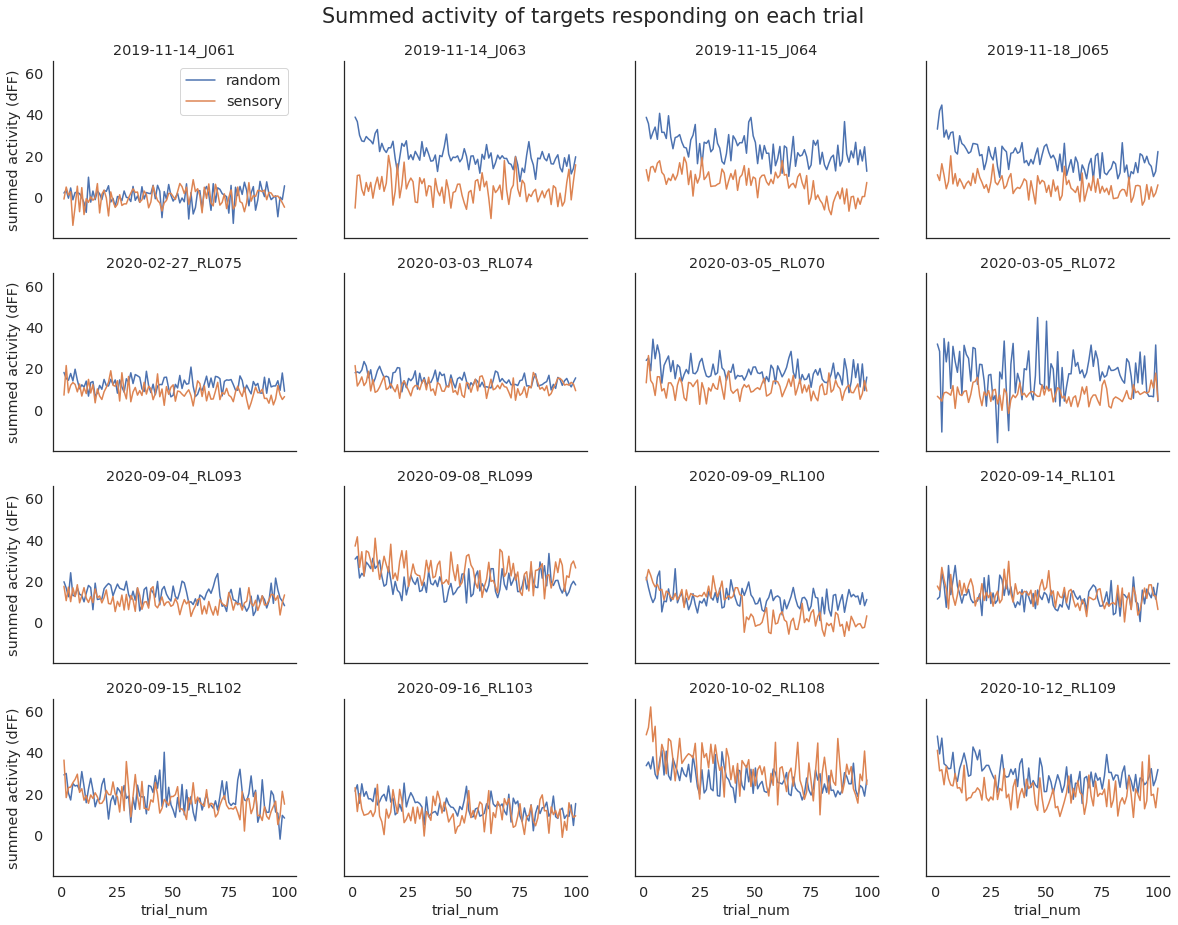

In [91]:
# Plot positive target responses over trials for all animals, on same graph
# plots = number, summed activity
# row/col = animal
# splitby = trial type (random/sensory/sham)
# SHARE Y AXIS

cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_trial_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_trial_df.pkl')

targets = ['pr', 'ps']
colors = ['C0', 'C1']

session_ids = cell_trial_df['session_id'].unique()   

fig, axes = plt.subplots(nrows=4, ncols=4, sharey=True, sharex=True, figsize=(20,15))

for color, target in zip(colors, targets):
    
    target_cell_ids = cell_df.query(target + '_target & ' + target + '_resp_sign').index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    
    filtered_df = cell_trial_df[target_filter] \
                   .groupby(['session_id', 'trial_num'])[target + '_amp_resp'] \
                   .sum() \
                   .reset_index(drop=False) \
        
    for row_i, row in enumerate(axes):
        for col_i, col in enumerate(row):

            session_df = filtered_df[filtered_df['session_id']==session_ids[(4*row_i)+col_i]]

            sns.lineplot(x='trial_num', y=target+'_amp_resp', data=session_df, ci=None, ax=col, label=target, legend=False)
            col.set_title(session_ids[(4*row_i)+col_i])
            if col_i==0 and row_i==0: col.legend(['random', 'sensory'])
            if col_i==0: col.set_ylabel('summed activity (dFF)')
                
plt.suptitle('Summed activity of targets responding on each trial', y=0.93, fontsize='xx-large');